In [1]:
#Importing numpy and pandas libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing input files
# The data is gathered from https://www.prokabaddi.com/stats and https://www.sportskeeda.com/go/pro-kabaddi/stats
# The data is gathered manually and not by web scraping methods
# Only data related with season 7 pro kabaddi league is used for predictions
# Schedule.csv           - This file contains the entire season 7 schedule with winners, unfinished matches will not have winner
# Playoff.csv            - This file contains the details of playoff matches schedule
# Raid_Points.csv        - Raid points of each team
# Tackle_Points.csv      - Tackling points of each team
# Super Raids.csv        - Super raids of each team
# Super Tackles.csv      - Super tackles of each team
# All-outs inflicted.csv - All-outs inflicted by each team
# All-outs conceded.csv  - All-outs conceded by each team
# Raider details.csv     - Top10 raider details about total raids and successful raids
# Tackler details.csv    - Top10 tackler details about total tackles and successful tackles

df1 = pd.read_csv('Schedule.csv')  
playoff = pd.read_csv('Playoff.csv')
r1 = pd.read_csv('Raid_Points.csv')
r5 = pd.read_csv('Tackle_Points.csv')
r9 = pd.read_csv('Super Raids.csv')
r10 = pd.read_csv('Super Tackles.csv')
r11 = pd.read_csv('All-outs inflicted.csv')
r12 = pd.read_csv('All-outs conceded.csv')
r21 = pd.read_csv('Raider details.csv')
r23 = pd.read_csv('Tackler details.csv')

In [3]:
#Predict the top team in the points table after the completion of the league matches
#Sorting the file based on teams for a better view
df1_sort = df1.sort_values(['Team 1','Team 2'],ascending=True)
df1_sort['team1team2'] = df1_sort['Team 1'] + df1_sort['Team 2']
df1_sort['team2team1'] = df1_sort['Team 2'] + df1_sort['Team 1']

In [4]:
#Splitting the schedule file into completed matches, non completed matches
df2 = df1_sort.loc[pd.isna(df1_sort["Winner"]), :]
df3 = df1_sort.loc[~(pd.isna(df1_sort["Winner"])), :]

### The below logic is to predict the outcome of upcoming matches based on earlier results in season 7.

In [5]:
for i in df2['team1team2'].index:
    k = df2.at[i,'team1team2']
    for j in df3['team1team2'].index:
        l = df3.at[j,'team1team2']
        if k == l:
            df2.at[i,'Winner'] = df3.at[j,'Winner']
            
for i in df2['team1team2'].index:
    for j in df3['team2team1'].index:
        k = df2.at[i,'team1team2']
        l = df3.at[j,'team2team1']
        if k == l:
                df2.at[i,'Winner'] = df3.at[j,'Winner']

### Combining both the files into single file. Now this combined file will have full schedule with results

In [6]:
df4 = df3.append(df2)

In [7]:
df4_sort = df4.sort_values(['Team 1','Team 2'],ascending=True)

### Calculating number of wins by each Team 

In [8]:
for i in df4_sort['Winner'].index:
    k = df4_sort.at[i,'Winner']
    l = df4_sort.at[i,'Team 1']
    if k == l:
        df4_sort.at[i,'Team1 win'] = 1
        df4_sort.at[i,'Team2 win'] = 0
    elif k == 'Draw':
        df4_sort.at[i,'Team1 win'] = 0.5
        df4_sort.at[i,'Team2 win'] = 0.5
    else:
        df4_sort.at[i,'Team2 win'] = 1
        df4_sort.at[i,'Team1 win'] = 0
            

In [9]:
df5 = df4_sort[['Team 1','Team1 win']]
df6 = df4_sort[['Team 2','Team2 win']]

In [10]:
df7 = df5.groupby('Team 1').sum()[['Team1 win']]
df8 = df6.groupby('Team 2').sum()[['Team2 win']]

In [11]:
df7 = df7.reset_index()
df8 = df8.reset_index()
df7.rename(columns = {'Team 1':'Team','Team1 win':'points'},inplace=True)
df8.rename(columns = {'Team 2':'Team','Team2 win':'points'},inplace=True)
df9 = pd.merge(df7,df8,on='Team',how='outer')

In [12]:
df9['points_x'].fillna(0, inplace=True)
df9['points_y'].fillna(0, inplace=True)

In [13]:
df9['Points'] = df9['points_x'] + df9['points_y']

In [14]:
df10 = df9[['Team','Points']]
df11 = df10.sort_values('Points',ascending=False)
df12 = df11.reset_index()
del df12['index']

In [15]:
#The dataframe df12 have the Team name and their respective win count
df12

,Team,Points
0,Dabang Delhi K.C.,17.5
1,Bengal Warriors,16.0
2,Haryana Steelers,15.5
3,U.P. Yoddha,12.5
4,Bengaluru Bulls,11.5
5,U Mumba,11.5
6,Jaipur Pink Panthers,10.0
7,Telugu Titans,9.0
8,Puneri Paltan,8.5
9,Patna Pirates,7.5


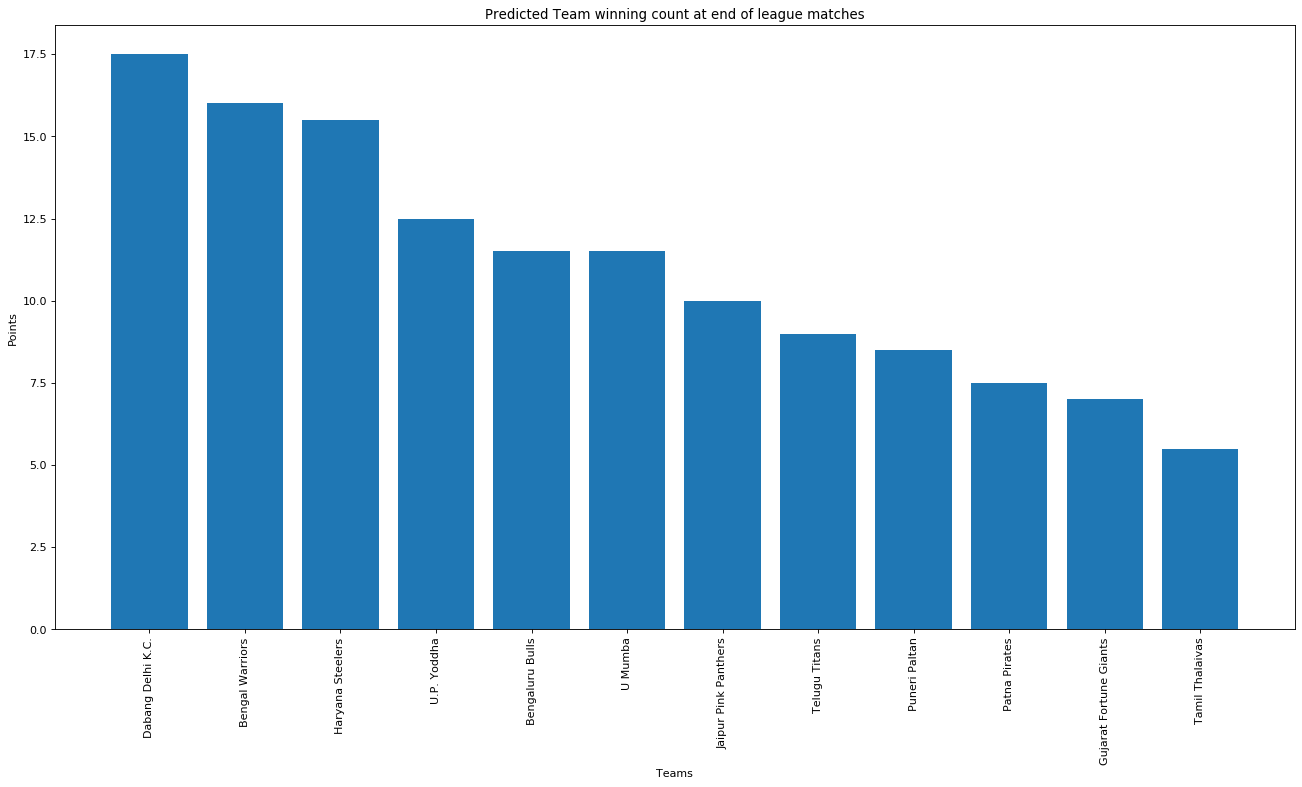

In [16]:
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.bar(df12['Team'], df12['Points'])
plt.xticks(rotation='vertical')
plt.title('Predicted Team winning count at end of league matches')
plt.xlabel('Teams')
plt.ylabel('Points')
plt.show()

In [17]:
#Identifying top ranked team at completion of league matches
df12.at[0,'Team']

'Dabang Delhi K.C.'

# Dabang Delhi K.C. is the table topper

In [18]:
#Predict the winner of the tournament
df12['Matches'] = 22
df12['Rank'] = range(1,13)
df12 = df12.reindex(columns=['Rank','Team','Matches','Points'])
top6 = df12.head(6)
top6['Level'] = 'l' + top6['Rank'].map(str)  
p1 = playoff.apply(lambda x: x.astype(str).str.lower())

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Replacing team names in playoff time table based on the predicted ranking table

In [19]:
for i in p1['Team 1'].index:
    k = p1.at[i,'Team 1']
    for j in top6['Level'].index:
        l = top6.at[j,'Level']
        if k == l:
            p1.at[i,'Team 1'] = top6.at[j,'Team']

In [20]:
for i in p1['Team 2'].index:
    k = p1.at[i,'Team 2']
    for j in top6['Level'].index:
        l = top6.at[j,'Level']
        if k == l:
            p1.at[i,'Team 2'] = top6.at[j,'Team']

In [21]:
p1['team1team2'] = p1['Team 1'] + p1['Team 2']
p1['team2team1'] = p1['Team 2'] + p1['Team 1']

In [22]:
p1['Team 1 count'] = 0
p1['Team 2 count'] = 0
p1['Team 1 points'] = 0
p1['Team 2 points'] = 0
df101 = df4_sort
df101['Team 1 points'].fillna(0, inplace=True)
df101['Team 2 points'].fillna(0, inplace=True)
for i in p1['team1team2'].index:
    k = p1.at[i,'team1team2']
    team1 = p1.at[i,'Team 1']
    team2 = p1.at[i,'Team 2']
    for j in df101['team1team2'].index:
        l = df101.at[j,'team1team2']
        if k == l:
            winner = df101.at[j,'Winner']
            p1.at[i,'Team 1 points'] += df101.at[j,'Team 1 points']
            p1.at[i,'Team 2 points'] += df101.at[j,'Team 2 points']
            if team1 == winner:
                p1.at[i,'Team 1 count'] += 1
            elif team2 == winner:
                p1.at[i,'Team 2 count'] += 1
            else:
                p1.at[i,'Team 1 count'] += .5
                p1.at[i,'Team 2 count'] += .5

In [23]:
for i in p1['team2team1'].index:
    k = p1.at[i,'team2team1']
    team1 = p1.at[i,'Team 1']
    team2 = p1.at[i,'Team 2']
    for j in df101['team1team2'].index:
        l = df101.at[j,'team1team2']
        if k == l:
            winner = df101.at[j,'Winner']
            p1.at[i,'Team 1 points'] += df101.at[j,'Team 2 points']
            p1.at[i,'Team 2 points'] += df101.at[j,'Team 1 points']
            if team1 == winner:
                p1.at[i,'Team 1 count'] += 1
            elif team2 == winner:
                p1.at[i,'Team 2 count'] += 1
            else:
                p1.at[i,'Team 1 count'] += .5
                p1.at[i,'Team 2 count'] += .5

In [24]:
p2 = p1
for i in p1['Team 1 count'].index:
    winner = p1.at[i,'Winner']
    team1 = p1.at[i,'Team 1']
    team2 = p1.at[i,'Team 2']
    t1cnt = p1.at[i,'Team 1 count']
    t2cnt = p1.at[i,'Team 2 count']
    t1pts = p1.at[i,'Team 1 points']
    t2pts = p1.at[i,'Team 2 points']
    if t1cnt > t2cnt:
        p2 = p2.replace(to_replace =winner,value = team1)
    elif t2cnt > t1cnt:
        p2 = p2.replace(to_replace =winner,value = team2)
    elif t1pts > t2pts:
        p2 = p2.replace(to_replace =winner,value = team1)
    elif t2pts < t1pts:
        p2 = p2.replace(to_replace =winner,value = team2)
    else:
        print('Not predicted')

Not predicted
Not predicted
Not predicted


In [25]:
p2['team1team2'] = p2['Team 1'] + p2['Team 2']
p2['team2team1'] = p2['Team 2'] + p2['Team 1']

In [26]:
for i in p2['team1team2'].index:
    k = p2.at[i,'team1team2']
    team1 = p2.at[i,'Team 1']
    team2 = p2.at[i,'Team 2']
    w1 = p2.at[i,'Winner']
    #if w1 == 's1' | w1 == 's2':
    for j in df101['team1team2'].index:
        l = df101.at[j,'team1team2']
        if (k == l and (w1 == 's1' or w1 == 's2')):

            winner = df101.at[j,'Winner']
            p2.at[i,'Team 1 points'] += df101.at[j,'Team 1 points']
            p2.at[i,'Team 2 points'] += df101.at[j,'Team 2 points']
            if team1 == winner:
                p2.at[i,'Team 1 count'] += 1
            elif team2 == winner:
                p2.at[i,'Team 2 count'] += 1
            else:
                p2.at[i,'Team 1 count'] += .5
                p2.at[i,'Team 2 count'] += .5


In [27]:
for i in p2['team2team1'].index:
    k = p2.at[i,'team2team1']
    team1 = p2.at[i,'Team 1']
    team2 = p2.at[i,'Team 2']
    w1 = p2.at[i,'Winner']
    for j in df101['team1team2'].index:
        l = df101.at[j,'team1team2']
        if (k == l and (w1 == 's1' or w1 == 's2')):
            winner = df101.at[j,'Winner']
            p2.at[i,'Team 1 points'] += df101.at[j,'Team 2 points']
            p2.at[i,'Team 2 points'] += df101.at[j,'Team 1 points']
            if team1 == winner:
                p2.at[i,'Team 1 count'] += 1
            elif team2 == winner:
                p2.at[i,'Team 2 count'] += 1
            else:
                p2.at[i,'Team 1 count'] += .5
                p2.at[i,'Team 2 count'] += .5

In [28]:
p3 = p2
for i in p2['Team 1 count'].index:
    winner = p2.at[i,'Winner']
    team1 = p2.at[i,'Team 1']
    team2 = p2.at[i,'Team 2']
    t1cnt = p2.at[i,'Team 1 count']
    t2cnt = p2.at[i,'Team 2 count']
    t1pts = p2.at[i,'Team 1 points']
    t2pts = p2.at[i,'Team 2 points']
    if (winner == 's1' or winner == 's2'):
        if t1cnt > t2cnt:
        #p2.at[i,'Winner'] = team1
            p3 = p3.replace(to_replace =winner,value = team1)
        elif t2cnt > t1cnt:
        #p2.at[i,'Winner'] = team2
            p3 = p3.replace(to_replace =winner,value = team2)
        elif t1pts > t2pts:
        #p2.at[i,'Winner'] = team1
            p3 = p3.replace(to_replace =winner,value = team1)
        elif t2pts > t1pts:
        #p2.at[i,'Winner'] = team2
            p3 = p3.replace(to_replace =winner,value = team2)
        else:
            print('Not predicted')

In [29]:
p3['team1team2'] = p3['Team 1'] + p3['Team 2']
p3['team2team1'] = p3['Team 2'] + p3['Team 1']


for i in p3['team1team2'].index:
    k = p3.at[i,'team1team2']
    team1 = p3.at[i,'Team 1']
    team2 = p3.at[i,'Team 2']
    w1 = p3.at[i,'Winner']
    #if w1 == 's1' | w1 == 's2':
    for j in df101['team1team2'].index:
        l = df101.at[j,'team1team2']
        if (k == l and (w1 == 'f')):

            winner = df101.at[j,'Winner']
            p3.at[i,'Team 1 points'] += df101.at[j,'Team 1 points']
            p3.at[i,'Team 2 points'] += df101.at[j,'Team 2 points']
            if team1 == winner:
                p3.at[i,'Team 1 count'] += 1
            elif team2 == winner:
                p3.at[i,'Team 2 count'] += 1
            else:
                p3.at[i,'Team 1 count'] += .5
                p3.at[i,'Team 2 count'] += .5
for i in p3['team2team1'].index:
    k = p3.at[i,'team2team1']
    team1 = p3.at[i,'Team 1']
    team2 = p3.at[i,'Team 2']
    w1 = p3.at[i,'Winner']
    for j in df101['team1team2'].index:
        l = df101.at[j,'team1team2']
        if (k == l and (w1 == 'f')):
            winner = df101.at[j,'Winner']
            p3.at[i,'Team 1 points'] += df101.at[j,'Team 2 points']
            p3.at[i,'Team 2 points'] += df101.at[j,'Team 1 points']
            if team1 == winner:
                p3.at[i,'Team 1 count'] += 1
            elif team2 == winner:
                p3.at[i,'Team 2 count'] += 1
            else:
                p3.at[i,'Team 1 count'] += .5
                p3.at[i,'Team 2 count'] += .5




In [30]:
p4 = p3
for i in p3['Team 1 count'].index:
    winner = p3.at[i,'Winner']
    team1 = p3.at[i,'Team 1']
    team2 = p3.at[i,'Team 2']
    t1cnt = p3.at[i,'Team 1 count']
    t2cnt = p3.at[i,'Team 2 count']
    t1pts = p3.at[i,'Team 1 points']
    t2pts = p3.at[i,'Team 2 points']
    if (winner == 'f'):
        if t1cnt > t2cnt:
        #p3.at[i,'Winner'] = team1
            p4 = p4.replace(to_replace =winner,value = team1)
        elif t2cnt > t1cnt:
        #p3.at[i,'Winner'] = team2
            p4 = p4.replace(to_replace =winner,value = team2)
        elif t1pts > t2pts:
        #p3.at[i,'Winner'] = team1
            p4 = p4.replace(to_replace =winner,value = team1)
        elif t2pts > t1pts:
        #p3.at[i,'Winner'] = team2
            p4 = p4.replace(to_replace =winner,value = team2)
        else:
            print('Not predicted')

In [31]:
p4

,Team 1,Team 2,Winner,team1team2,team2team1,Team 1 count,Team 2 count,Team 1 points,Team 2 points
0,Haryana Steelers,U Mumba,Haryana Steelers,Haryana SteelersU Mumba,U MumbaHaryana Steelers,2,0,30,27
1,U.P. Yoddha,Bengaluru Bulls,U.P. Yoddha,U.P. YoddhaBengaluru Bulls,Bengaluru BullsU.P. Yoddha,2,0,35,33
2,Dabang Delhi K.C.,Haryana Steelers,Haryana Steelers,Dabang Delhi K.C.Haryana Steelers,Haryana SteelersDabang Delhi K.C.,1,1,66,68
3,Bengal Warriors,U.P. Yoddha,Bengal Warriors,Bengal WarriorsU.P. Yoddha,U.P. YoddhaBengal Warriors,1,1,77,49
4,Haryana Steelers,Bengal Warriors,Bengal Warriors,Haryana SteelersBengal Warriors,Bengal WarriorsHaryana Steelers,1,1,72,81


In [32]:
#Identifying Winner of the tournment
p4.at[4,'Winner']

'Bengal Warriors'

# Bengal Warriors is the winner of this tournement

In [33]:
#Predict the team with the highest points for successful raids.

#Finding number of matches will be played by each team
p5 = p4[['Team 1','Team 2']]
def count_word(word):
    cnt = sum([p5[x].str.count(word).sum() for x in p5.columns])
    return cnt
k = 0
p6 = pd.DataFrame()
for i in p5.columns:
    for j in p5.index:
        word = p5.at[j,i]
        cnt1 = count_word(word)
        k +=1
        p6.at[k,'Team'] = word
        p6.at[k,'count'] = cnt1

In [34]:
p6.drop_duplicates(subset=None,keep='first',inplace=True)
pf12 = df12
for i in p6.index:
    for j in pf12.index:
        if p6.at[i,'Team'] == pf12.at[j,'Team']:
            pf12.at[j,'Matches'] += p6.at[i,'count']

In [35]:
pf12

,Rank,Team,Matches,Points
0,1,Dabang Delhi K.C.,23,17.5
1,2,Bengal Warriors,24,16.0
2,3,Haryana Steelers,25,15.5
3,4,U.P. Yoddha,24,12.5
4,5,Bengaluru Bulls,23,11.5
5,6,U Mumba,23,11.5
6,7,Jaipur Pink Panthers,22,10.0
7,8,Telugu Titans,22,9.0
8,9,Puneri Paltan,22,8.5
9,10,Patna Pirates,22,7.5


In [36]:
r2 = pd.merge(pf12,r1,left_on='Team',right_on='Name',how='outer')
r3 = r2[['Team','Matches','Matches played','Raid points']]
r3['Matches left'] = r3['Matches'] - r3['Matches played']
r3['expected raid points'] = (r3['Raid points'] * r3['Matches left']) / r3['Matches played']

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [37]:
r3['Total Raid Points'] = r3['Raid points'] + r3['expected raid points']

In [38]:
max_raid_pts = r3['Total Raid Points'].max()
i = r3[r3['Total Raid Points'] == max_raid_pts].index[0]
r4 = r3.at[i,'Team']

In [39]:
r4

'Bengal Warriors'

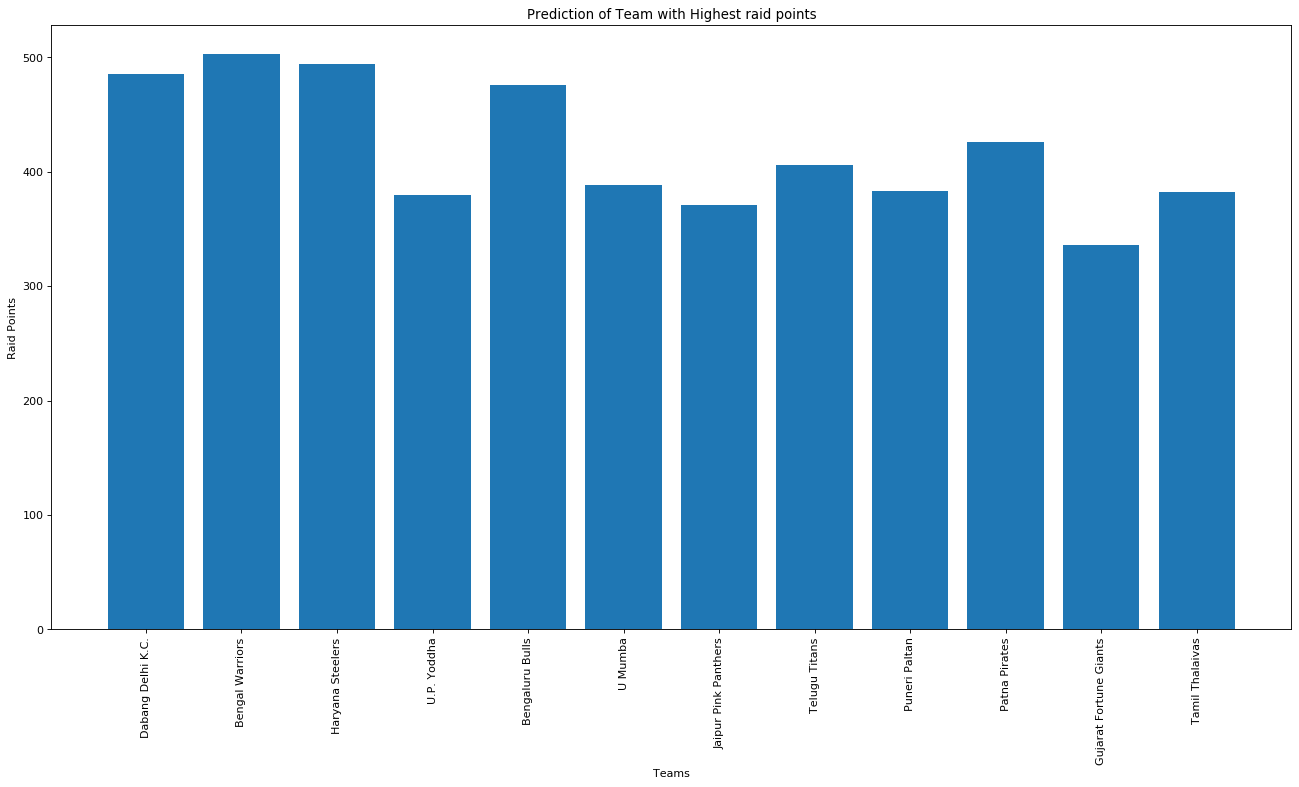

In [40]:
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.bar(r3['Team'], r3['Total Raid Points'])
plt.xticks(rotation='vertical')
plt.title('Prediction of Team with Highest raid points')
plt.xlabel('Teams')
plt.ylabel('Raid Points')
plt.show()

# Bengal warriors will score Highest raid points

In [41]:
#Predict the team with the highest points for successful tackles. 

In [42]:

r6 = pd.merge(pf12,r5,left_on='Team',right_on='Name',how='outer')

r7 = r6[['Team','Matches','Matches played','Tackle points']]

r7['Matches left'] = r7['Matches'] - r7['Matches played']
r7['expected Tackle points'] = (r7['Tackle points'] * r7['Matches left']) / r7['Matches played']

r7['Total Tackle Points'] = r7['Tackle points'] + r7['expected Tackle points']

max_Tackle_pts = r7['Total Tackle Points'].max()
i = r7[r7['Total Tackle Points'] == max_Tackle_pts].index[0]

r8 = r7.at[i,'Team']

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [43]:
r8

'Haryana Steelers'

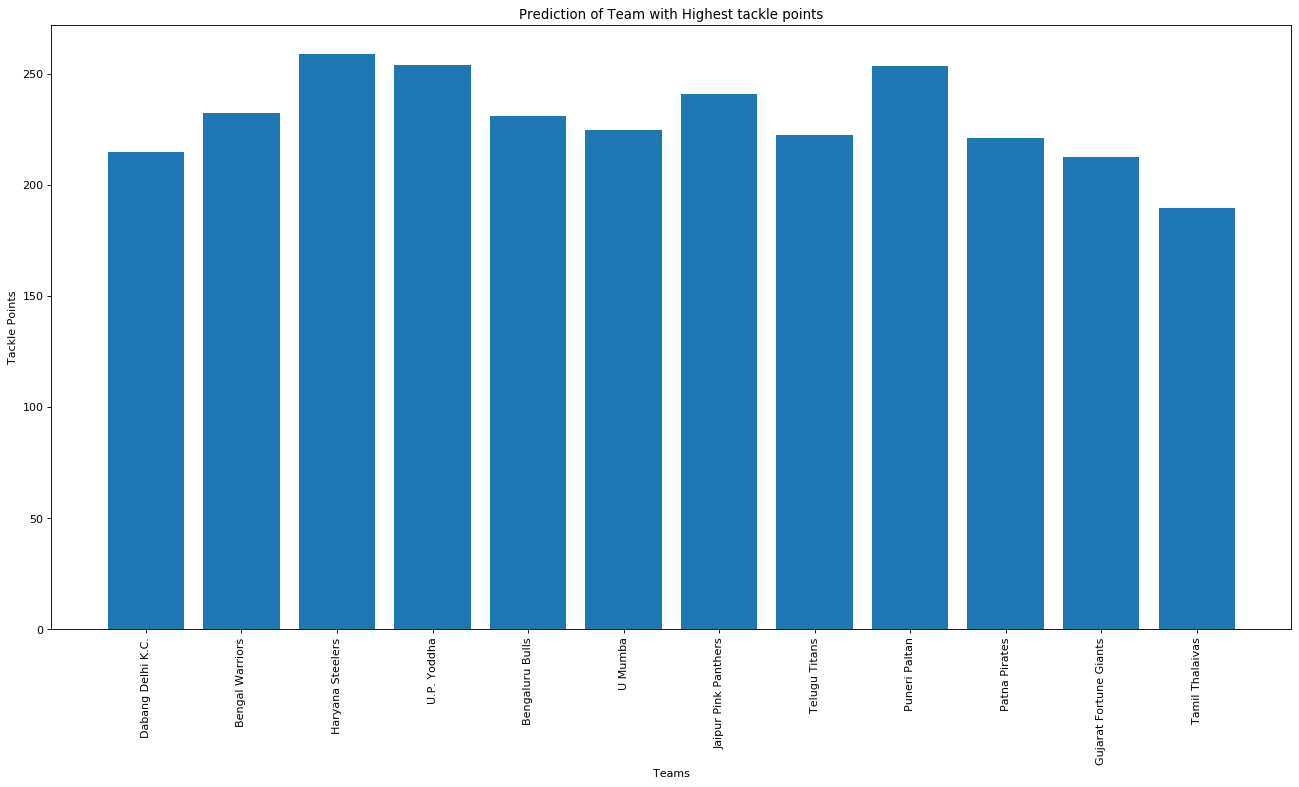

In [44]:
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.bar(r7['Team'], r7['Total Tackle Points'])
plt.xticks(rotation='vertical')
plt.title('Prediction of Team with Highest tackle points')
plt.xlabel('Teams')
plt.ylabel('Tackle Points')
plt.show()

# Haryana Steelers will score Highest Tackle points in this season

In [45]:
#Predict the team with the highest super-performance total
r13 = pd.merge(r9,r10,on='Name',how='outer')
r14 = pd.merge(r11,r12,on='Name',how='outer')
r15 = pd.merge(r13,r14,on='Name',how='outer')

In [46]:
r16 = r15[['Name','Matches played_x_x','Super raid','Super tackles','All-outs inflicted','All-outs conceded']]

In [47]:
r16 = r16.rename(columns = {"Matches played_x_x": "Matches played"}) 

In [48]:
r16.replace(to_replace ="Gujarat Fortunegiants", 
                 value ="Gujarat Fortune Giants",inplace=True) 


In [49]:
r16['SPT'] = r16['Super raid'] + r16['Super tackles'] + r16['All-outs inflicted'] - r16["All-outs conceded"]

In [50]:
r17 = r16[['Name','Matches played','SPT']]

In [51]:

r18 = pd.merge(pf12,r17,left_on='Team',right_on='Name',how='outer')

r19 = r18[['Name','Matches','Matches played','SPT']]

r19['Matches left'] = r19['Matches'] - r19['Matches played']
r19['expected SPT'] = (r19['SPT'] * r19['Matches left']) / r19['Matches played']

r19['Total SPT'] = r19['SPT'] + r19['expected SPT']

max_SPT = r19['Total SPT'].max()
i = r19[r19['Total SPT'] == max_SPT].index[0]

r20 = r19.at[i,'Name']

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [52]:
r20

'Bengal Warriors'

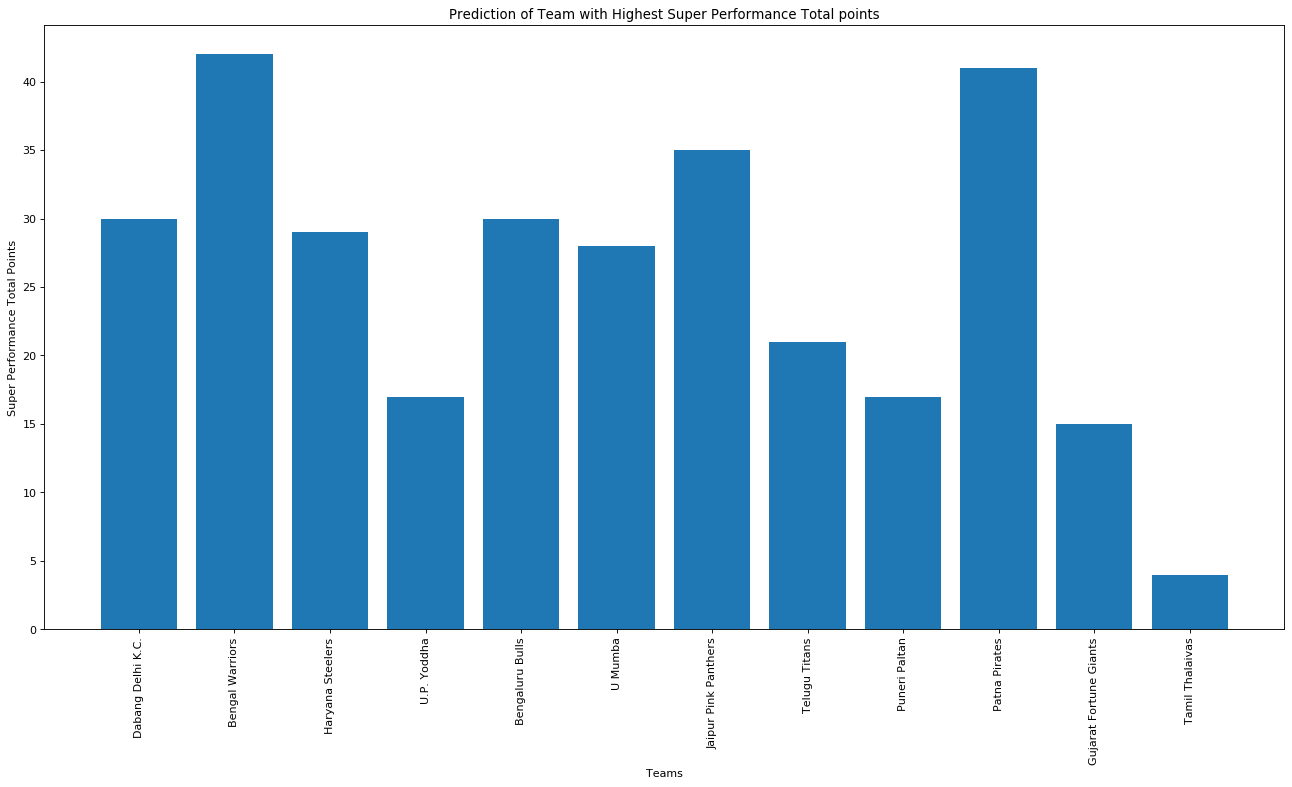

In [53]:
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.bar(r19['Name'], r19['SPT'])
plt.xticks(rotation='vertical')
plt.title('Prediction of Team with Highest Super Performance Total points')
plt.xlabel('Teams')
plt.ylabel('Super Performance Total Points')
plt.show()

# Bengal warriors will score the Higher Super Performance Total

In [54]:
#Predict the player with the highest SUCCESSFUL RAID percentage

In [55]:
r21['Successful raids %'] = 100 * r21['Successful raids'] / r21['Total raids']
max_rpct = r21['Successful raids %'].max()
i = r21[r21['Successful raids %'] == max_rpct].index[0]

r22 = r21.at[i,'Name']
r22

'Pawan Kumar Sehrawat'

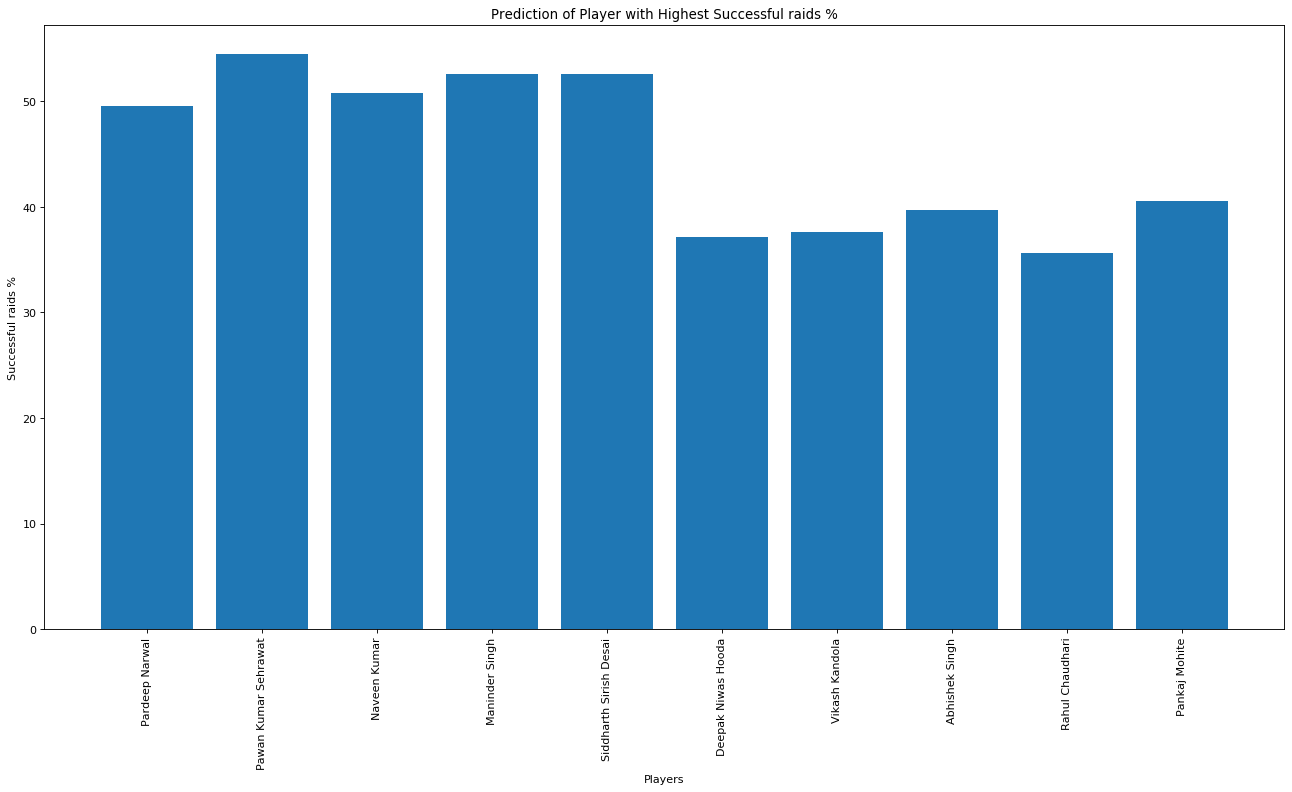

In [56]:
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.bar(r21['Name'], r21['Successful raids %'])
plt.xticks(rotation='vertical')
plt.title('Prediction of Player with Highest Successful raids %')
plt.xlabel('Players')
plt.ylabel('Successful raids %')
plt.show()

# Pawan Kumar Sehrawat is the player with the highest SUCCESSFUL RAID percentage

In [57]:
r23['Successful tackles %'] = 100 * r23['Successful tackles'] / r23['Total tackles']
max_rpct = r23['Successful tackles %'].max()
i = r23[r23['Successful tackles %'] == max_rpct].index[0]
r24 = r23.at[i,'Name']

In [58]:
r24

'Fazel Atrachali'

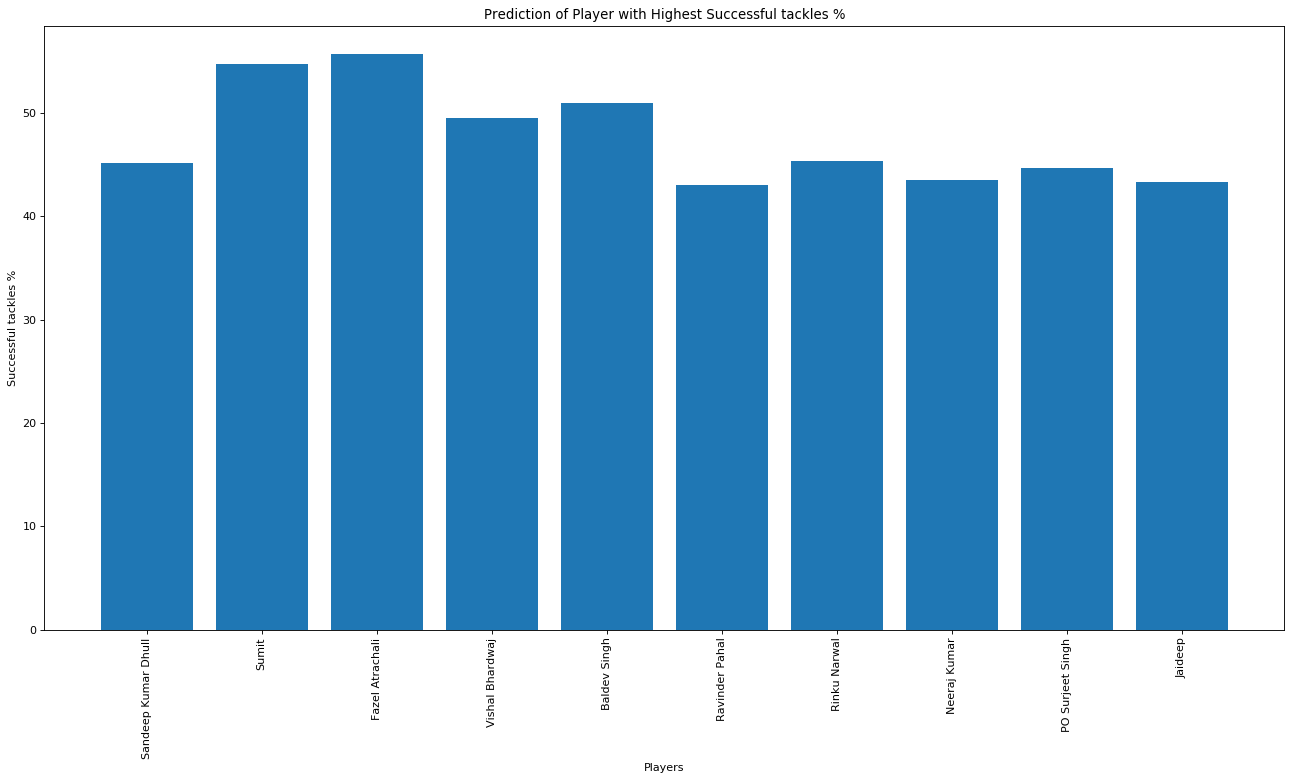

In [59]:
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.bar(r23['Name'], r23['Successful tackles %'])
plt.xticks(rotation='vertical')
plt.title('Prediction of Player with Highest Successful tackles %')
plt.xlabel('Players')
plt.ylabel('Successful tackles %')
plt.show()

# Fazel Atrachali is the player with the highest SUCCESSFUL RAID percentage